<a href="https://colab.research.google.com/github/JMML2021/0201-estructures_dades/blob/main/Tasca_M5_T02_Machine_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [40]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Abro el fichero una vez adecuado

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
df1.iloc[0]

Hay  505 filas con 14 columnas


0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

Veo que es un fichero sin nombre en las columnas. Utilizo el fichero de TXT e identifico los nombres de las columnas.

In [43]:
nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

In [44]:
# Analizo los datos
print(df1.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [45]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     505 non-null    float64
 1   (ZN,)       505 non-null    float64
 2   (INDUS,)    505 non-null    float64
 3   (CHAS,)     505 non-null    int64  
 4   (NOX,)      505 non-null    float64
 5   (RM,)       505 non-null    float64
 6   (AGE,)      505 non-null    float64
 7   (DIS,)      505 non-null    float64
 8   (RAD,)      505 non-null    int64  
 9   (TAX,)      505 non-null    float64
 10  (PTRATIO,)  505 non-null    float64
 11  (B,)        505 non-null    float64
 12  (LSTAT,)    505 non-null    float64
 13  (MEDV,)     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


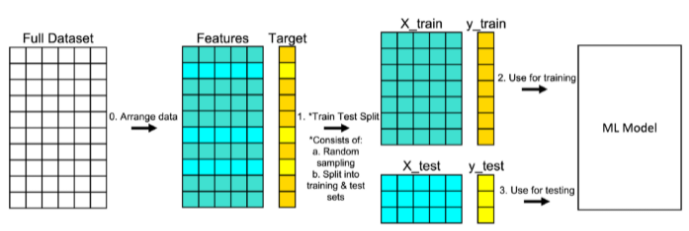

In [59]:
columnas = list(df1.columns[:-1])
#columnas[0][0]
columnas

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',)]

In [62]:
features = ['CRIM','ZN','INDUS','CHAS','NOX']
features = columnas
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]

In [65]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:

from sklearn.model_selection import train_test_split   
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


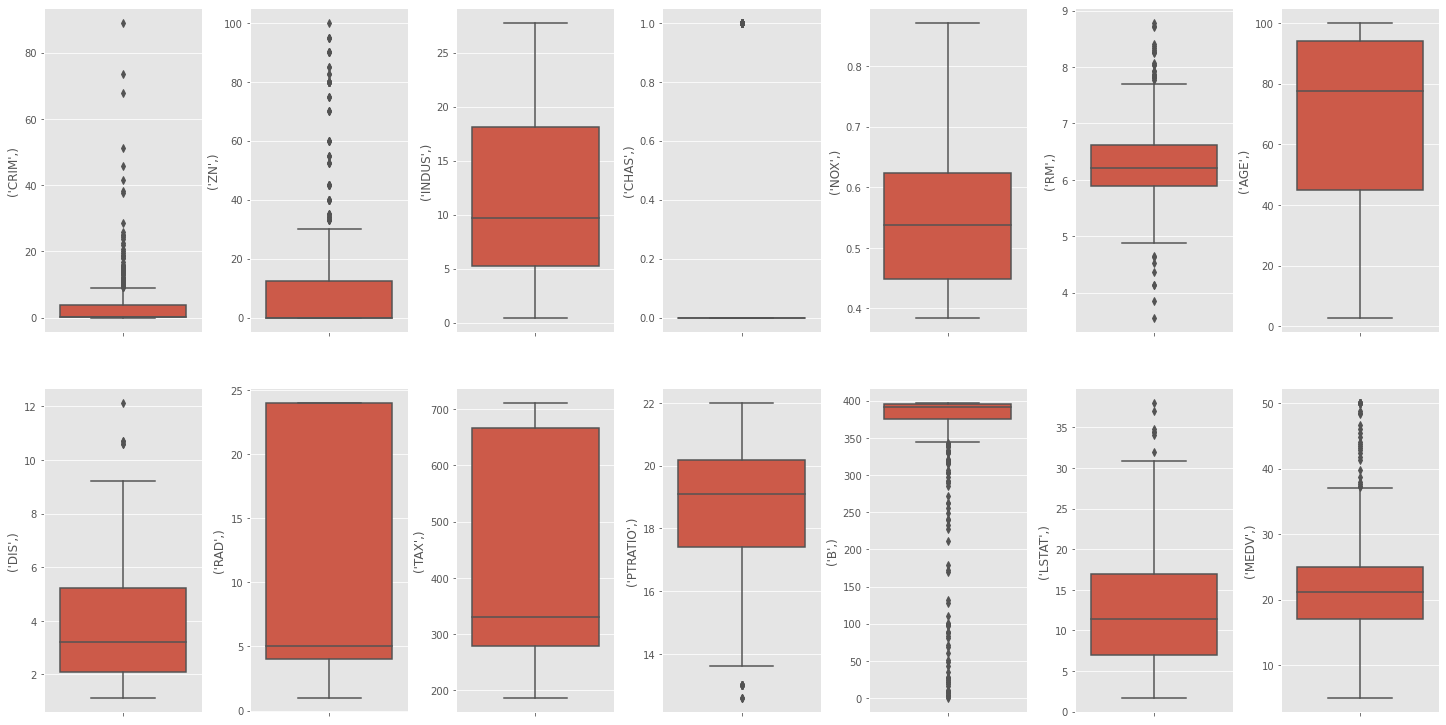

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

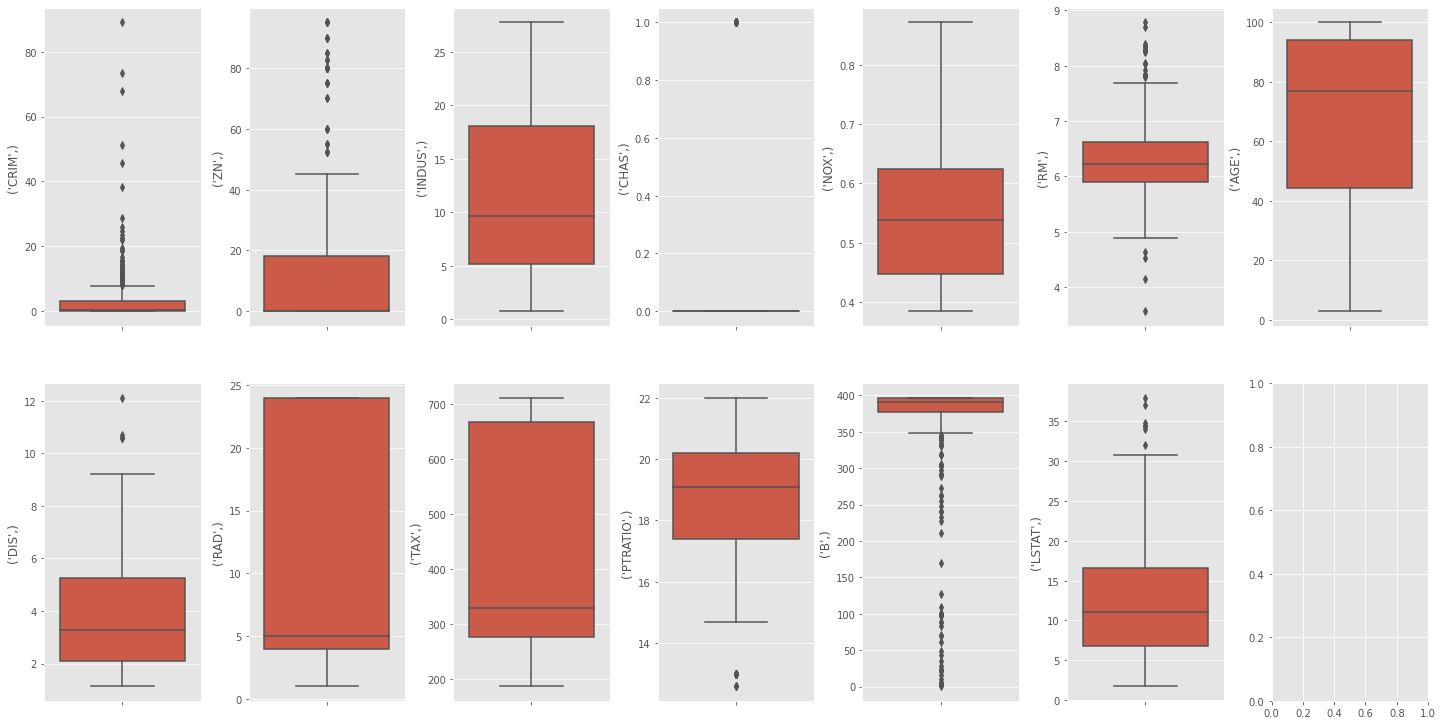

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

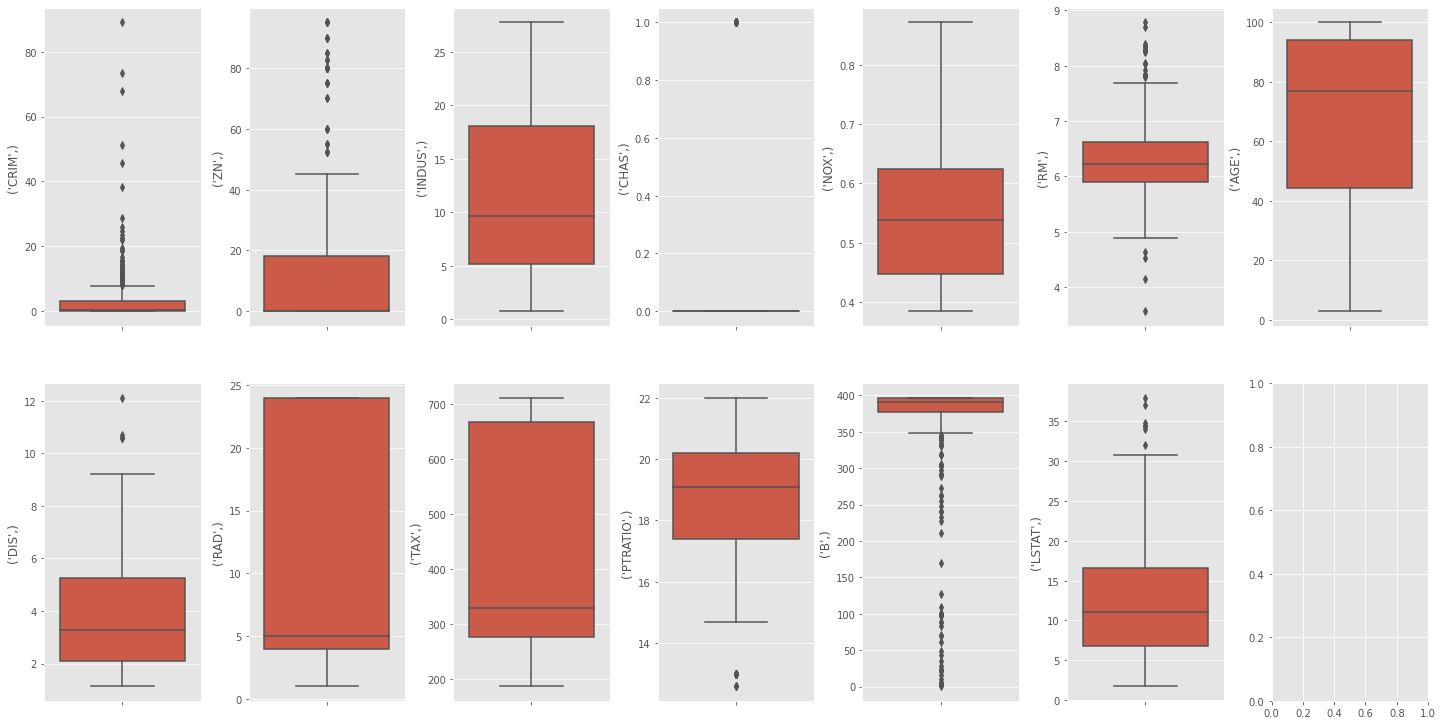

In [80]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

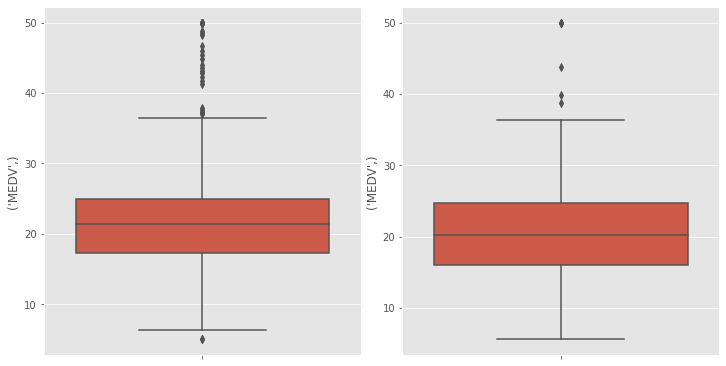

In [97]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in ytrain.items():
    sns.boxplot(y=k, data=ytrain, ax=axs[0])
    sns.boxplot(y=k, data=ytest, ax=axs[1])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

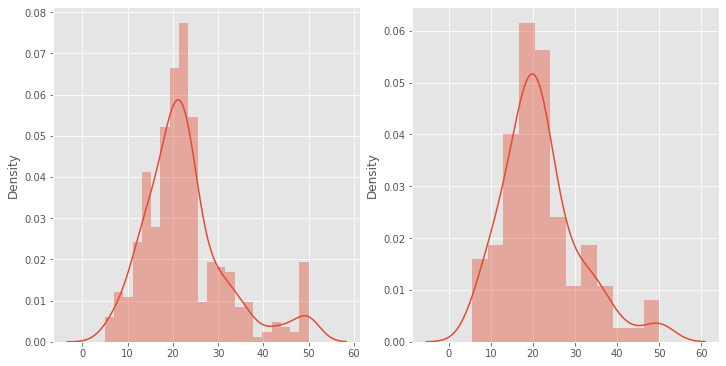

In [106]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(ytrain['MEDV'], ax=axs[0])
sns.distplot(ytest['MEDV'], ax=axs[1])
    #sns.distplot(v, ax=axs[index])

    #index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Veo que visualmente las dos graficas de los datos split son muy parecidas, por lo que deduzco que lo ha hecho correctamente.


# - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).